<a href="https://colab.research.google.com/github/posadari/Coding-Challenge/blob/master/ACM_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
data = pd.read_csv("ClusterPlot.csv")
data

,Unnamed: 0,V1,V2
0,0,4.30,0.80
1,1,3.95,0.80
2,2,3.95,0.75
3,3,3.85,0.85
4,4,4.30,0.80
...,...,...,...
145,145,4.85,3.75
146,146,4.40,3.45
147,147,4.75,3.60
148,148,4.80,3.85


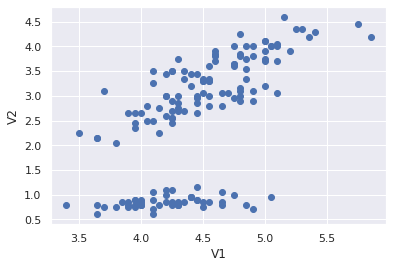

In [32]:
plt.scatter(data['V1'],data['V2'])
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [33]:
x = data.copy()

In [34]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
clusters = x.copy()
clusters['clusters_pred']=kmeans.fit_predict(x)

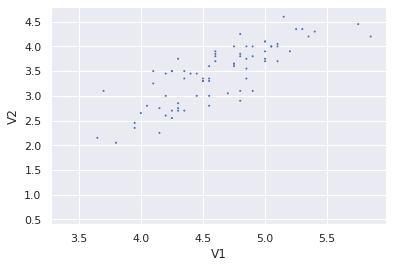

In [36]:
plt.scatter(clusters['V1'],clusters['V2'],clusters['clusters_pred'],cmap='rainbow')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [ ]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

In [ ]:
wcss=[]

for i in range(1, 150):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)
wcss

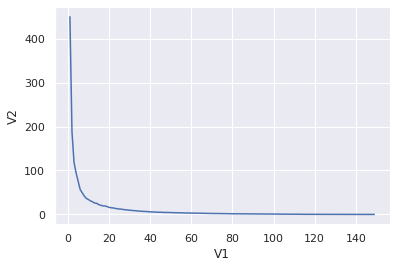

In [41]:
plt.plot(range(1, 150),wcss)
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [93]:
kmeans_new=KMeans(8)
kmeans.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(x_scaled)
cluster_new

,Unnamed: 0,V1,V2,cluster_pred
0,0,4.30,0.80,7
1,1,3.95,0.80,0
2,2,3.95,0.75,0
3,3,3.85,0.85,0
4,4,4.30,0.80,7
...,...,...,...,...
145,145,4.85,3.75,6
146,146,4.40,3.45,3
147,147,4.75,3.60,6
148,148,4.80,3.85,6


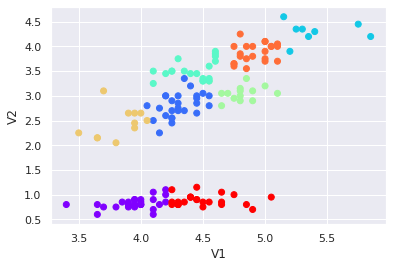

In [94]:
plt.scatter(cluster_new['V1'],cluster_new['V2'],c=cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()